In [5]:
import numpy as np
import scipy.io
import scipy
from scipy import stats
from ipynb.fs.full.utils import *
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file_path = 'E:/FPP_files_and_codes/FPP_files/relabeled_seconds/corrected_GPT_labeling/final_labels.csv'

RelabelDataframe = pd.read_csv(file_path)

In [7]:
RelabelDataframe

,prv_label,new_label
0,NaN,NaN
1,abdomen,Body
2,airliner,Object
3,airplane,Object
4,animal,Animal
...,...,...
595,woman,Body
596,work,Unclear
597,workshop,Place
598,wristband,Object


In [8]:
RelabelDictionary = {}
for index, row in RelabelDataframe.iterrows():
    if index != 0:
        RelabelDictionary[row['prv_label']] = row['new_label']
RelabelDictionary[''] = float('nan')

In [9]:
labels_list_1 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie1_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_1.append(labels)
labels_list_2 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie2_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_2.append(labels)
labels_list_3 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie3_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_3.append(labels)
labels_list_4 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie4_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_4.append(labels)
labels_list = labels_list_1 + labels_list_2 + labels_list_3  + labels_list_4
print(len(labels_list))

3655


In [10]:
RelabeldFrames = [set() for i in range(3655)]
for i in range(3655):
    for j in labels_list[i]:
        RelabeldFrames[i].add(str(RelabelDictionary[j]))

In [11]:
RelabeldFrames

[{'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'B

In [12]:
P_AFB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and ('Animal' not in i) and ('Face' not in i) and ('Body' not in i)):
        P_AFB.append(k)
    k += 1
print(len(P_AFB))

566


In [13]:
PAFB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and( ('Animal' in i) or ('Face' in i) or ('Body' in i))):
        PAFB.append(k)
#         print(i)
    k += 1
print(len(PAFB))

1945


In [14]:
P_FB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and ('Face' not in i) and ('Body' not in i)):
        P_FB.append(k)
    k += 1
print(len(P_FB))

609


In [15]:
PFB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and(('Face' in i) or ('Body' in i))):
        PFB.append(k)
#         print(i)
    k += 1
print(len(PFB))

1902


In [16]:
delay = 4
P_AFB_Delay = (np.array(P_AFB) + delay)% 3655
PAFB_Delay = (np.array(PAFB) + delay)% 3655
PFB_Delay = (np.array(PFB) + delay)% 3655
P_FB_Delay = (np.array(P_FB) + delay)% 3655

In [17]:
mean_FPPs_activity = mean_FPPs_movie_data()

In [54]:
mean_FPPs_activity.shape

(5, 3655)

In [55]:
Mean_FPPs_P_AFB = np.mean(mean_FPPs_activity[:,P_AFB_Delay], axis=1)
Mean_FPPs_PAFB = np.mean(mean_FPPs_activity[:,PAFB_Delay], axis=1)
Mean_FPPs_PFB = np.mean(mean_FPPs_activity[:,PFB_Delay], axis=1)
Mean_FPPs_P_FB = np.mean(mean_FPPs_activity[:,P_FB_Delay], axis=1)
SEM_FPPs_P_AFB = stats.sem(mean_FPPs_activity[:,P_AFB_Delay], axis=1)
SEM_FPPs_PAFB = stats.sem(mean_FPPs_activity[:,PAFB_Delay], axis=1)
SEM_FPPs_PFB = stats.sem(mean_FPPs_activity[:,PFB_Delay], axis=1)
SEM_FPPs_P_FB = stats.sem(mean_FPPs_activity[:,P_FB_Delay], axis=1)

In [56]:
SEM_FPPs_P_AFB

array([0.00826121, 0.01052617, 0.01161247, 0.00934355, 0.00852963])

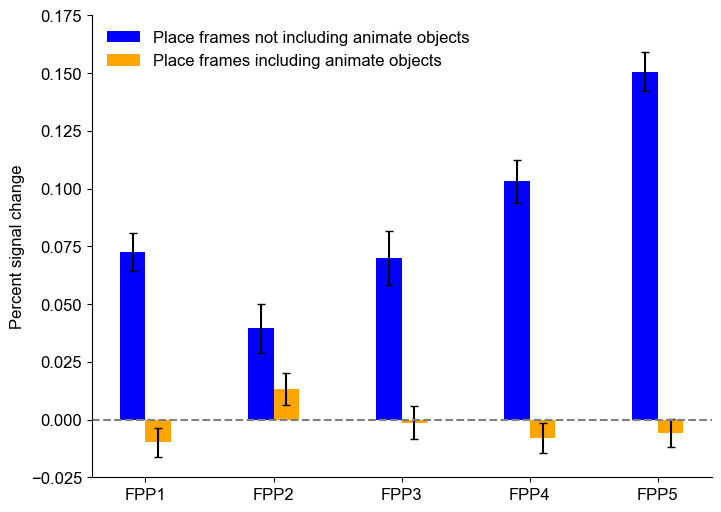

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2 

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'arial'

bars1_1 = ax.bar(np.arange(5) - width/2, Mean_FPPs_P_AFB, width, yerr=SEM_FPPs_P_AFB, capsize=3, label='Place frames not including animate objects', color='blue')
bars1_2 = ax.bar(np.arange(5) + width/2, Mean_FPPs_PAFB, width, yerr=SEM_FPPs_PAFB, capsize=3, label='Place frames including animate objects', color='orange')

ax.set_xticks(np.arange(5))
ax.set_xticklabels(['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5'])
plt.ylim(-0.025, 0.175)
plt.yticks(np.arange(-0.025, 0.18, 0.025))
# ax.set_xlabel('FPPS')
ax.set_ylabel('Percent signal change')

# ax.set_title('comparing frames with place (considering animal as animate)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.box(False)
# plt.savefig('E:/FPP_files_and_codes/Figures/Figure4_files/Row3/frames_barplot.png', dpi=600, bbox_inches='tight')

plt.show()

# indoor and outdoor bar for frame place not including animate objects

In [1]:
import pandas as pd
indoor_outdoor = pd.read_csv('E:\FPP_files_and_codes\FPP_codes\Figure4_analysis\Scene_Classification.csv')

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\roza\AppData\Local\Temp\ipykernel_35928\820131934.py:2: SyntaxWarning: invalid escape sequence '\F'
  indoor_outdoor = pd.read_csv('E:\FPP_files_and_codes\FPP_codes\Figure4_analysis\Scene_Classification.csv')


In [4]:
indoor_outdoor

,Second,Classification
0,20,Indoor
1,21,Outdoor
2,22,Outdoor
3,23,Outdoor
4,24,Outdoor
...,...,...
561,3606,Outdoor
562,3611,Indoor
563,3612,Outdoor
564,3613,Outdoor


In [ ]:
label = indoor_outdoor[indoor_outdoor['Second'] == 3626]['Classification'].values[0]


In [32]:
label

'Outdoor'

In [22]:
len(RelabeldFrames)

3655

In [40]:
outdoor = []
indoor = []
k = 0
for sec,i in enumerate(RelabeldFrames):
    if (('Place' in i) and ('Animal' not in i) and ('Face' not in i) and ('Body' not in i)):
        label = indoor_outdoor[indoor_outdoor['Second'] == sec]['Classification'].values[0]
        if(label == 'Outdoor'):
            outdoor.append(k)
        else:
            indoor.append(k)
    k += 1

In [63]:
outdoor

[21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 47,
 48,
 117,
 118,
 119,
 120,
 121,
 132,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 299,
 300,
 301,
 308,
 309,
 313,
 340,
 341,
 342,
 343,
 351,
 352,
 353,
 354,
 355,
 356,
 362,
 364,
 370,
 371,
 380,
 389,
 390,
 394,
 395,
 401,
 402,
 403,
 404,
 405,
 421,
 422,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 481,
 482,
 483,
 484,
 485,
 486,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 871,
 872,
 877,
 878,
 879,
 892,
 941,
 942,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1037,
 1188,
 1189,
 1190,
 1230,
 1737,
 1738,
 1739,
 1740,
 1741,
 1742,
 1743,
 1744,
 1745,
 1746,
 1747,
 1748,
 1749,
 17

In [64]:
indoor

[20,
 295,
 296,
 297,
 298,
 381,
 420,
 458,
 459,
 460,
 734,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1903,
 1931,
 1932,
 1944,
 1989,
 1995,
 2010,
 2060,
 2088,
 2340,
 2343,
 2345,
 2360,
 2361,
 2401,
 2402,
 2523,
 2592,
 2594,
 2595,
 2596,
 2611,
 2612,
 2613,
 2710,
 2774,
 2781,
 2782,
 2793,
 2818,
 2819,
 2820,
 2821,
 2822,
 2823,
 2824,
 2825,
 2826,
 2827,
 2828,
 2908,
 2917,
 2928,
 2929,
 2930,
 2939,
 2940,
 2941,
 2942,
 2943,
 2944,
 2945,
 2946,
 2947,
 2950,
 2951,
 2952,
 2953,
 2957,
 2958,
 2972,
 2973,
 3276,
 3611]

In [45]:
delay = 4
outdoor_Delay = (np.array(outdoor) + delay)% 3655
indoor_Delay = (np.array(indoor) + delay)% 3655

In [49]:
mean_FPPs_activity = mean_FPPs_movie_data()

In [ ]:
Mean_outdoor_Delay = np.mean(mean_FPPs_activity[:,outdoor_Delay], axis=1)
Mean_indoor_Delay = np.mean(mean_FPPs_activity[:,indoor_Delay], axis=1)
Mean_FPPs_PAFB = np.mean(mean_FPPs_activity[:,PAFB_Delay], axis=1)

SEM_outdoor_Delay= stats.sem(mean_FPPs_activity[:,outdoor_Delay], axis=1)
SEM_indoor_Delay = stats.sem(mean_FPPs_activity[:,indoor_Delay], axis=1)
SEM_FPPs_PAFB = stats.sem(mean_FPPs_activity[:,PAFB_Delay], axis=1)

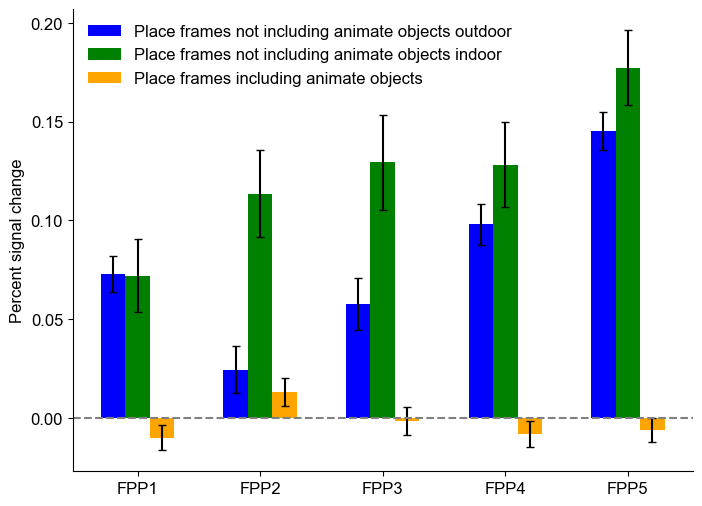

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2 

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'arial'

x = np.arange(5)

bars1_1 = ax.bar(x - width, Mean_outdoor_Delay, width, yerr=SEM_outdoor_Delay, capsize=3, label='Place frames not including animate objects outdoor', color='blue')
bars1_2 = ax.bar(x, Mean_indoor_Delay, width, yerr=SEM_indoor_Delay, capsize=3, label='Place frames not including animate objects indoor', color='green')
bars1_2 = ax.bar(x + width, Mean_FPPs_PAFB, width, yerr=SEM_FPPs_PAFB, capsize=3, label='Place frames including animate objects', color='orange')

ax.set_xticks(np.arange(5))
ax.set_xticklabels(['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5'])
# plt.ylim(-0.025, 0.175)
# plt.yticks(np.arange(-0.025, 0.18, 0.025))
# ax.set_xlabel('FPPS')
ax.set_ylabel('Percent signal change')

# ax.set_title('comparing frames with place (considering animal as animate)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.box(False)
# plt.savefig('E:/FPP_files_and_codes/Figures/Figure4_files/Row3/frames_barplot.png', dpi=600, bbox_inches='tight')

plt.show()